In [9]:
import time

import torch
import pytorch_lightning as pl
from matplotlib import pyplot as plt 
import numpy as np

from genomics_models import gru, conv_gru

In [5]:
%matplotlib inline

You need to specify a path to trained weights:

In [27]:
path = "weights/CONV4-GRU-sl10000-ker21-hs256-nl2.pt"

In [28]:
model = conv_gru.EncoderConvGRU.load_from_checkpoint(path)

Load data from disk:

```
X_path = "..."
y_path = "..."
```

In [11]:
X_path = "data/b_data/x/0.pt"
y_path = "data/b_data/y/0.pt"

X = torch.load(X_path)
y = torch.load(y_path)

In [24]:
len(X)

30000000

For example, you want to apply weights to some segment of the data `X0` and `y0`. You can do as following:


In [29]:
seq_len = 1000

X0 = X[:seq_len].unsqueeze(0)
y0 = y[:seq_len]

with torch.no_grad():
    y_hat = model(X0)

`y_hat` has dimension `(1, seq_len - kernel_size + 1, n_class)`. 
In the following case `seq_len` = 1000,  `kernel_size` = 51 and `n_class` = 20

For plotting a heatmap, do following:

In [31]:
y_plot = y_hat.squeeze(0).detach().numpy().T

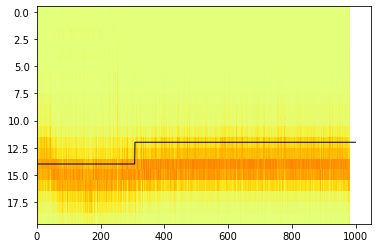

In [32]:
plt.imshow(np.exp(y_plot), cmap='Wistia', aspect='auto')
plt.plot(y0, lw=1, c='black')

For full genome you can do:

In [ ]:
seq_len = 300000

with torch.no_grad():
    for i in range(0, len(X), seq_len):
        
        X0 = X[i:i+seq_len].unsqueeze(0)
        y_hat = model(X0)
        
        # do whatever with y_hat
    